#                                          Problem Statement
##                                        **SMS spam Classification  Problem**
- Spam messages refer to unsolicited or unwanted messages/emails that are sent in bulk to users. In most messaging/emailing services, messages are detected as spam automatically so that these messages do not unnecessarily flood the users’ inboxes. These messages are usually promotional and peculiar in nature. Thus, it is possible for us to build ML/DL models that can detect Spam messages. **(Classification Problem)**

# Machine Learning Project Life cycle

### 1. Data Collection:
- The first step of the ML pipeline involves the collection of data and integration of data.
- Data collected acts as an input to the model (data preparation phase)
- Inputs are called features.
- The more the data is, more the better our model becomes..
- Data preparation phase starts in which we manually and critically explore the data.


### 2. Data Preparation:
    
   ##### A. Exploratory Data Analysis (EDA)
        - Univariate Analysis: Analysis of each features indivitually present in the dataframe through visualisation tools and frameworks.
        - Multivariate Analysis: Analysis of each features with respect to target feature present in the dataframe through visualisation tools and frameworks.
   ##### B. Data Preprocessing
        - Feature imputation - Imputing the missing values present in the given dataset.
        - Feature encoding - Handling categorical data via Label encoding, Ordinal encoding and One Hot encoding 
        - Feature selection - Selection of best no of features which in turn give the resultant equivalent to result   obtained during selection of all the feature but time consumtion for prediction and training the model decreases.  
        - Handle imbalances - Handling the outliers present in dataframe either by capping or trimming them.
### 3. Model Building:

   ##### A. Choosing an algorithm - 
       - Working with all the possible algorithm's.          
   #### B. Hyperparameter Tuning 
       - Hyper tunning the parameter of the algorithm used via Gridsearchcv and Randomgridsearch. 
   ##### C. Performance metrics
       - Checking the performance metrics of the algorithm applied to the dataframe.
    
### 4. Model Deployment:
    - Deploying the best resultant algorithm for getting the best accurate prediction.

In [24]:
# Importing all the required libraries and visualization tools 

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import probplot
import scipy.stats as stats 

from sklearn.model_selection import train_test_split

#importing encoding libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

#importing scaling libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#importing imputation libraries
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator

#importing feature selection libraries
from sklearn.feature_selection import chi2,SelectKBest

#Importing feature extraction libraries
from sklearn.decomposition import PCA


#importing Column transformer and Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


#importing the classification model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
!pip install xgboost
from xgboost import XGBClassifier

#import metrics for calculating efficiency of the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

#nltk and wordcloud importing 
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
!pip install wordcloud
from wordcloud import WordCloud
from collections import Counter

#Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer  

from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\medee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\medee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable


In [6]:
#importing the data from CSV file downloaded from kaggle
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")


In [7]:
#check for first five rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
#check for last five rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
#shape of the dataset
df.shape

(5572, 5)

In [10]:
#check for percent of Nan values
df.isnull().mean()*100
##Unnamed: 2, unnamed: 3 and unnamed: 4 has 99 % of nan value so we will drop these column

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [11]:
#droping the unrelevant columns in dataset
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
#check for duplicated values
df.duplicated().sum()
##403 duplicated rows present in the given dataset 

403

In [13]:
#remove the duplicated rows
df.drop_duplicates(keep='first',inplace=True)

In [14]:
#shape of data frame after removing nan and duplicated
print('Shape of dataframe :', df.shape)
print('-'*125)

print('5 Sample of data set are:')
df.sample(5)

Shape of dataframe : (5169, 2)
-----------------------------------------------------------------------------------------------------------------------------
5 Sample of data set are


,v1,v2
4642,ham,Sorry i din lock my keypad.
1516,ham,I need to come home and give you some good lov...
451,ham,Thanks for this hope you had a good day today
884,ham,Yoyyooo u know how to change permissions for a...
3661,ham,"What are you doing in langport? Sorry, but I'l..."


In [15]:
# Changing the name of column to get better intuition of the given data set
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

# Feature engineering

**Since the data has alot of featuring need to be done so i am intiating feature engineering first before EDA analysis**
- As per the above given dataframe, we need to do the following feature engineering:    
    - **Handling Categorical Target column** - Label encoding need to be done on targeted column.
    - **Feature construction** - We need to construct new feature in order to get information of number of sentences, words and letter present in each of the message.This would definately increase the efficiency of the end model. Moreover such insights should be well presented in order get good picture of your Machine learning program.
    - **Feature Construction** - Following steps are being implmented to get a new feature(transformed_text) from text:
        - **Lower Case** - Lowering the case of sentences.
        - **Tokenization** - break in words.
        - **Remove the special characters and punctuation** - Since special charctors and punctuation are just supporting  
        elements of text, we will remove it as the same doesn't imply information of spam message.
        - **Stemming** - Converting each word to its first form.
        
         The above steps provide good results of model both on test set and new data. 
        


In [16]:
#Handling categorical target column
le= LabelEncoder()
df['target'] = le.fit_transform(df.target)
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#Computing the number of alphabet,word and sentences present in the text column - Constructing new feature
df.text.str.split()

0       [Go, until, jurong, point,, crazy.., Available...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor..., U, c, already...
4       [Nah, I, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568       [Will, Ì_, b, going, to, esplanade, fr, home?]
5569    [Pity,, *, was, in, mood, for, that., So...any...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [18]:
#computing the number of character in each sentence
df['num_characters'] = df.text.apply(lambda x: len(x))
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
#computing the number of words in each text message 
df['num_words']  = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
#computing the number of sentences in each text message
df['num_sentences'] = df.text.apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
# Creating new function for transforming the text

def transform_text(text):
    #step1 lower the case letter of text
    text = text.lower()
    #step2 tokenisation of text
    text = nltk.word_tokenize(text)
    #step3 removing special chractor
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
       
    #step4 removing punctuation and stopword
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)   
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [27]:
#tranforming the text column by removing Punctuation mark,Stopword and Special character and finally lowering the case of letters
ps = PorterStemmer()
df['transformed_text'] = df.text.apply(lambda x: transform_text(x))

In [28]:
#checking for the first 5 column
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


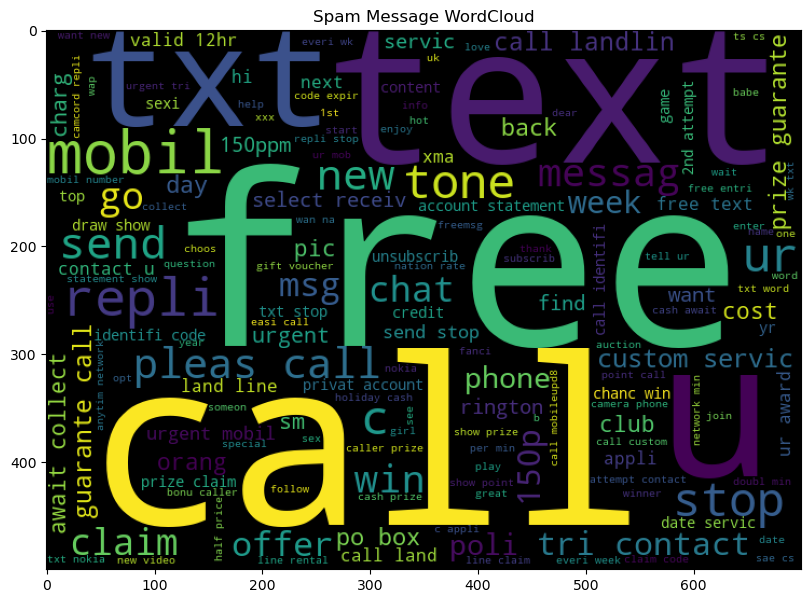

In [174]:
#Check for word cloud which show the important words of working
##Check for word cloud of spam data
plt.figure(figsize=(10,7))
wc= WordCloud(width=700,height=500,background_color='black',min_font_size=10)
spam_wc = wc.generate(df[df.target == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.title('Spam Message WordCloud')
plt.show()


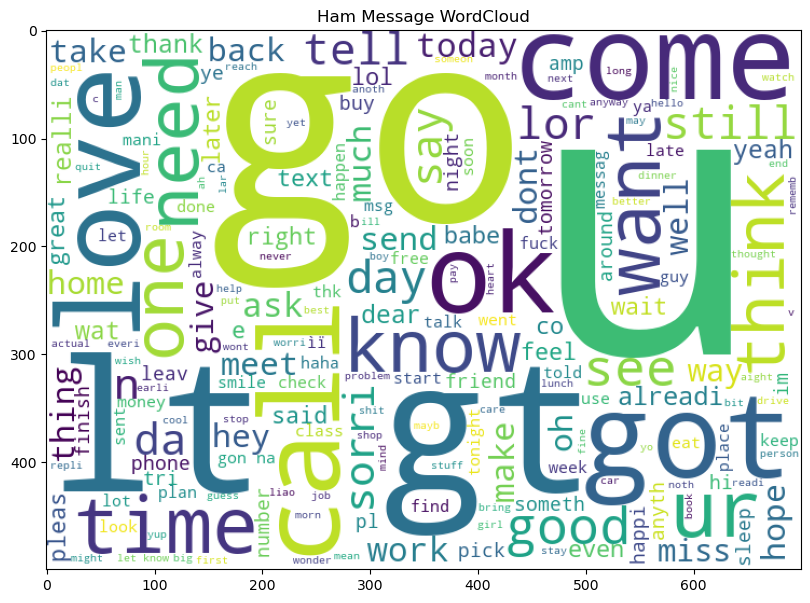

In [175]:
##Check for word cloud of spam data
plt.figure(figsize=(10,7))
wc= WordCloud(width=700,height=500,background_color='white',min_font_size=10)
ham_wc = wc.generate(df[df.target == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.title('Ham Message WordCloud')
plt.show()

# Exploratory Data anaylsis of the obtained featured Dataframe

In [31]:
#info of the final dataframe
df.info()
## No need to change the dtype as all the feature have correct datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   target            5169 non-null   int32 
 1   text              5169 non-null   object
 2   num_characters    5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   num_sentences     5169 non-null   int64 
 5   transformed_text  5169 non-null   object
dtypes: int32(1), int64(3), object(2)
memory usage: 262.5+ KB


## Univariate Analysis

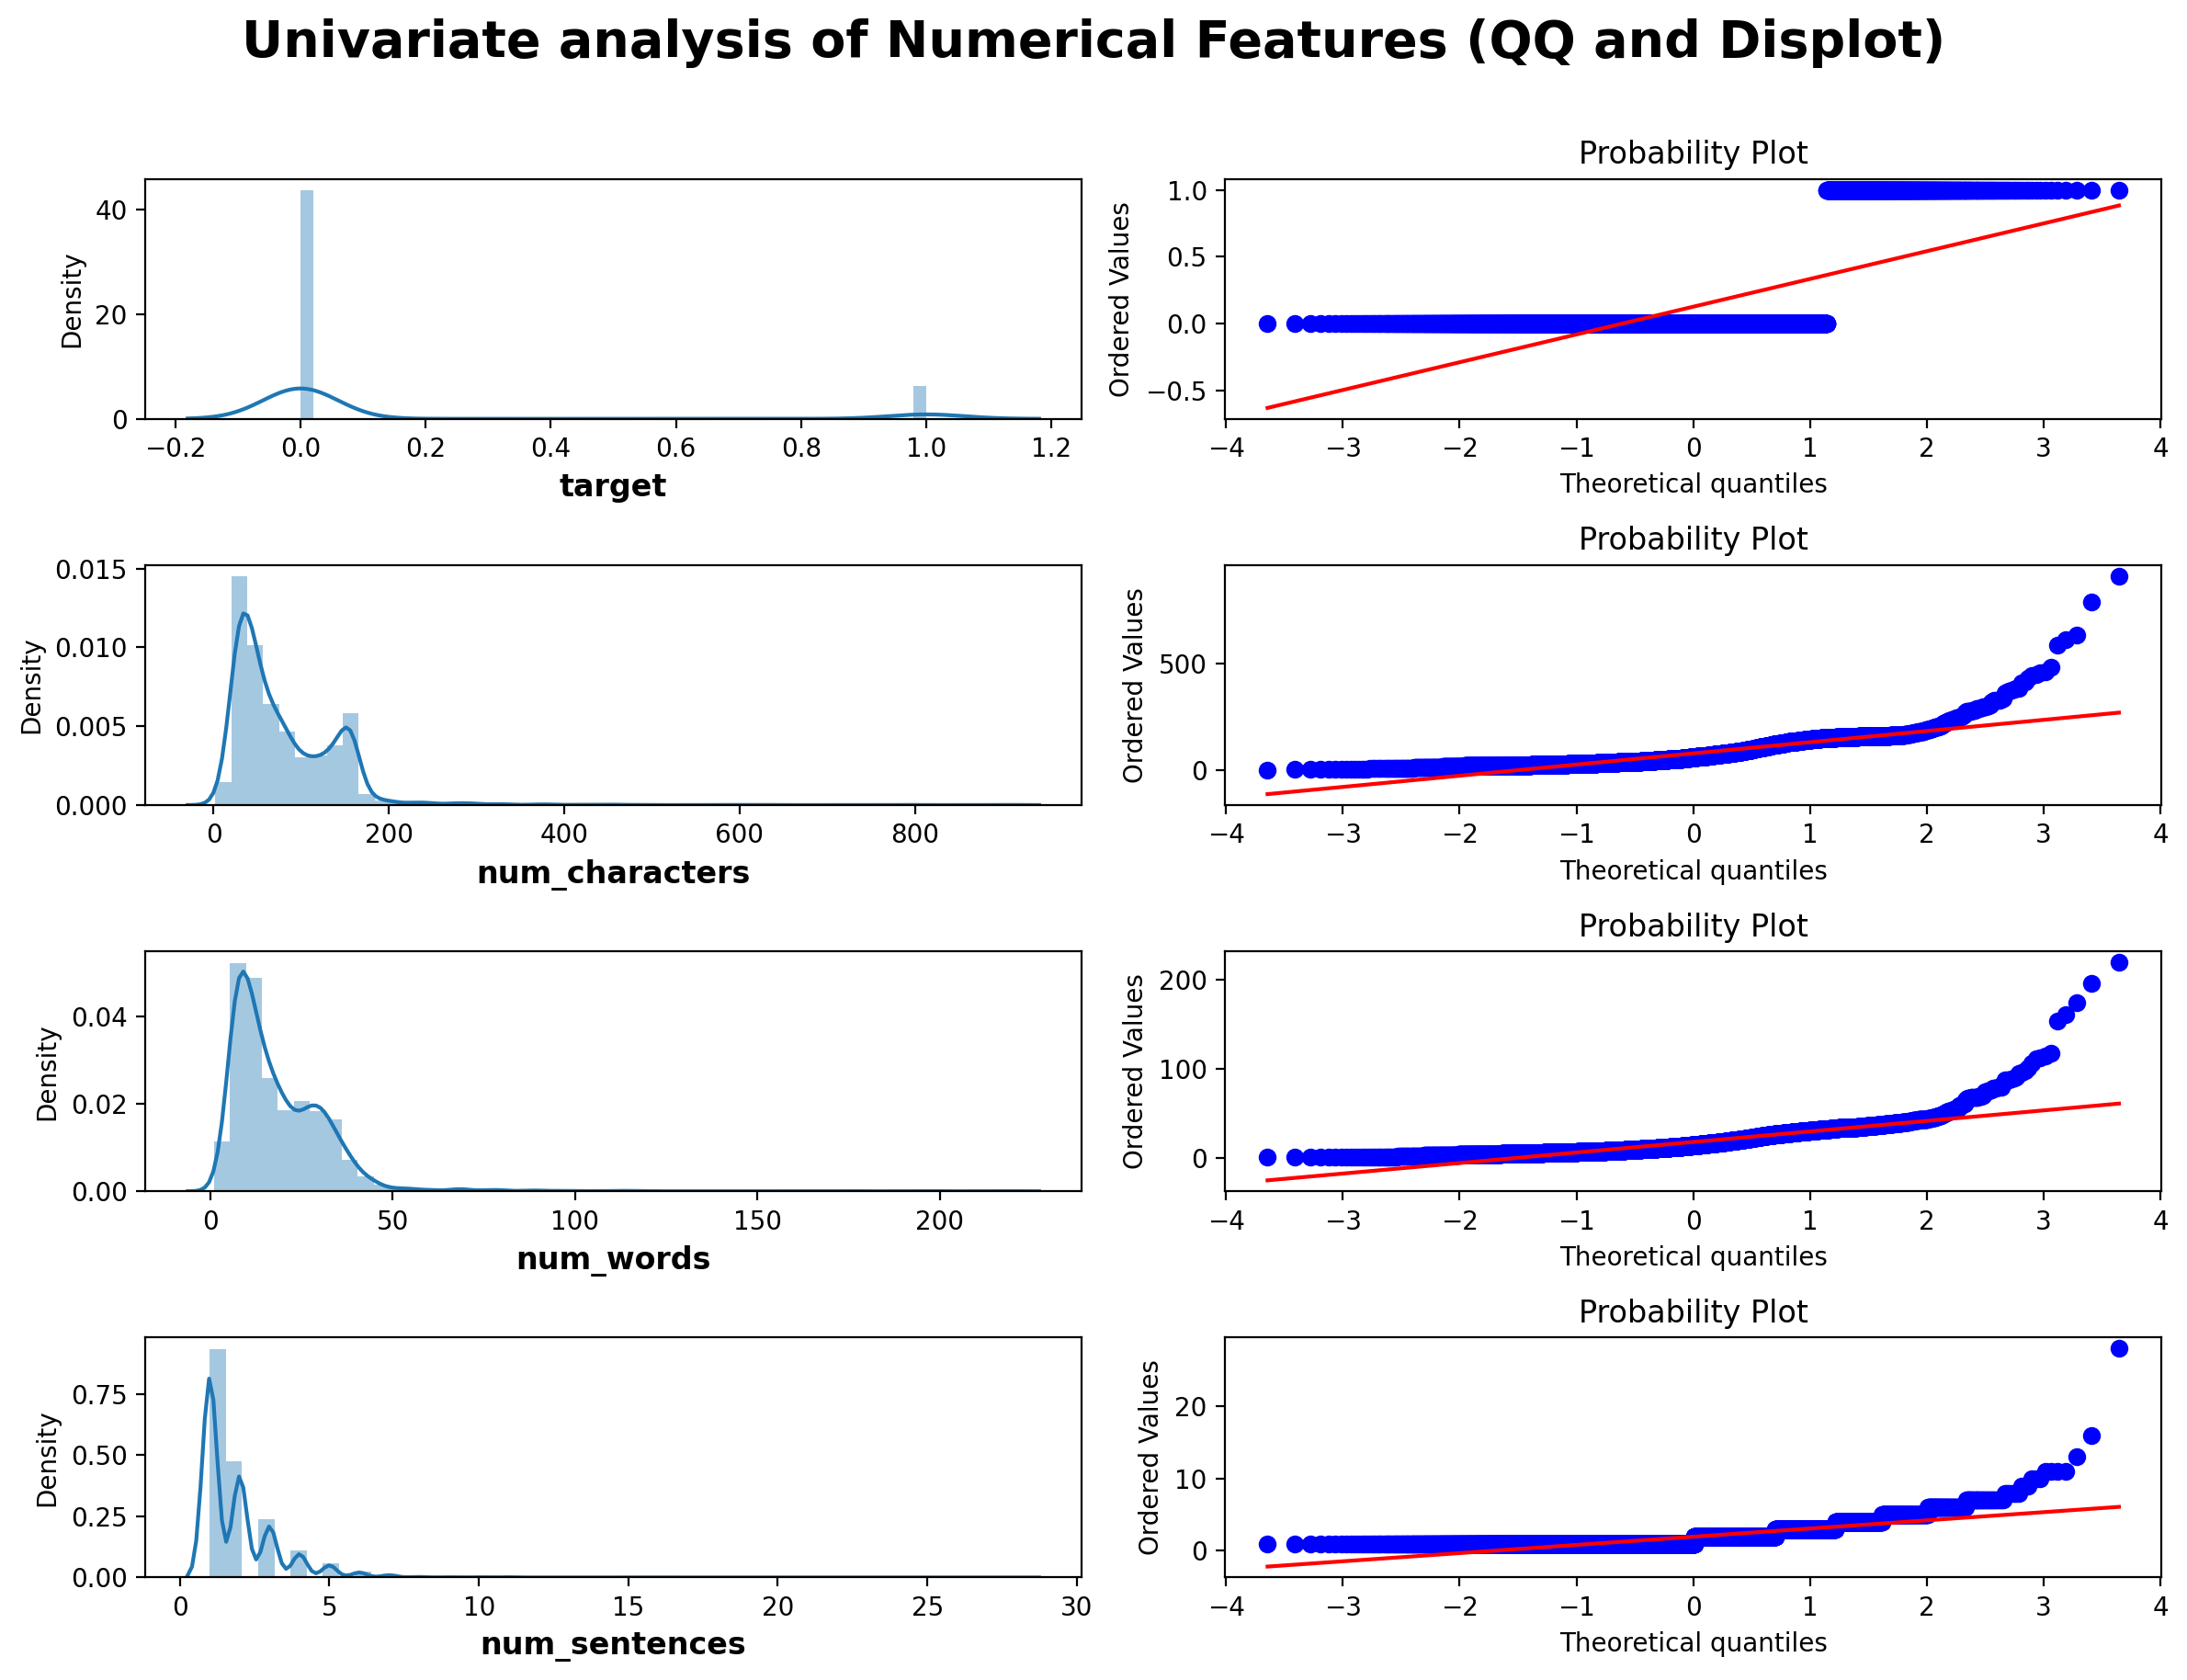

In [32]:
## QQ plot and distplot for the numerical feature

def univarite_distplot_QQ_numerical(df):
    
    plt.figure(figsize=(12,9),dpi=200)
    plt.suptitle('Univariate analysis of Numerical Features (QQ and Displot)',fontsize=20,fontweight='bold',alpha=1,y=1.01)
    
    i=0
    
    for col in df:
        if df[col].dtype != 'object':
            plt.subplot(4,2,i+1)
            sns.distplot(df[col])
            plt.xlabel(col,fontdict={'fontsize':12,'fontweight':'bold'})
            
            plt.subplot(4,2,i+2)
            stats.probplot(df[col],dist='norm',plot=plt)

            
            plt.tight_layout()
            i+=2
            
univarite_distplot_QQ_numerical(df)

# Bivariate and Multivariate Analysis

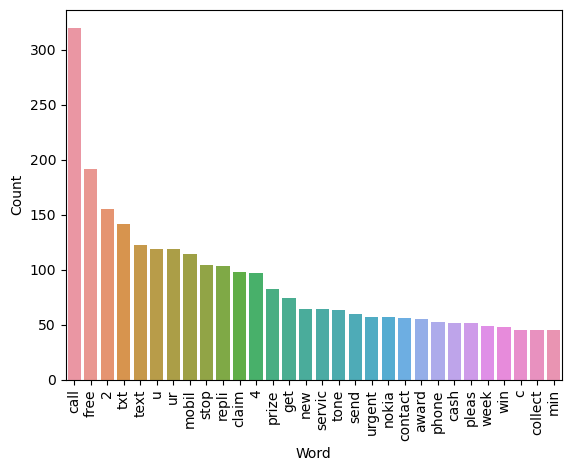

In [33]:
# Check for top 30 used word in spam and ham message
##Spam text message
spam_word = []
for msg in df[df.target == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_word.append(word)
    
df_word_count_top30_spam = pd.DataFrame(Counter(spam_word).most_common(30),columns=['Word','Count'])
sns.barplot(df_word_count_top30_spam['Word'],df_word_count_top30_spam['Count'])
plt.xticks(rotation='vertical')
plt.show()



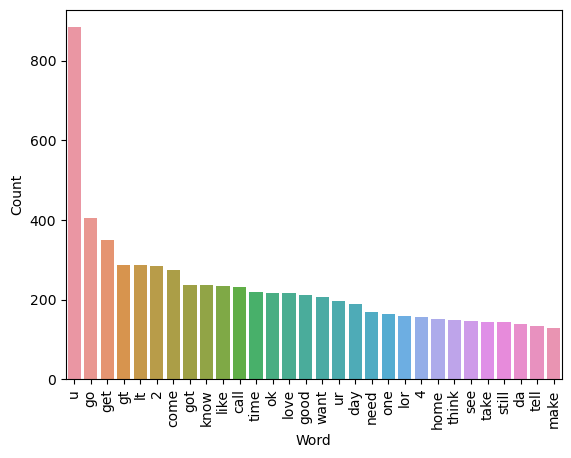

In [332]:
# Check for top 30 used word in spam and ham message
##ham text message
ham_word = []
for msg in df[df.target == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_word.append(word)
    
df_word_count_top30_spam = pd.DataFrame(Counter(ham_word).most_common(30),columns=['Word','Count'])
sns.barplot(df_word_count_top30_spam['Word'],df_word_count_top30_spam['Count'])
plt.xticks(rotation='vertical')
plt.show()

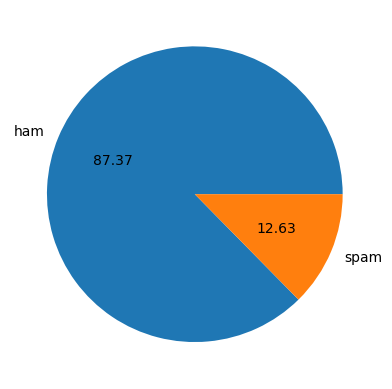

In [34]:
# pie plot for target column

plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()
#the pie plot implies data is highly imbalnced

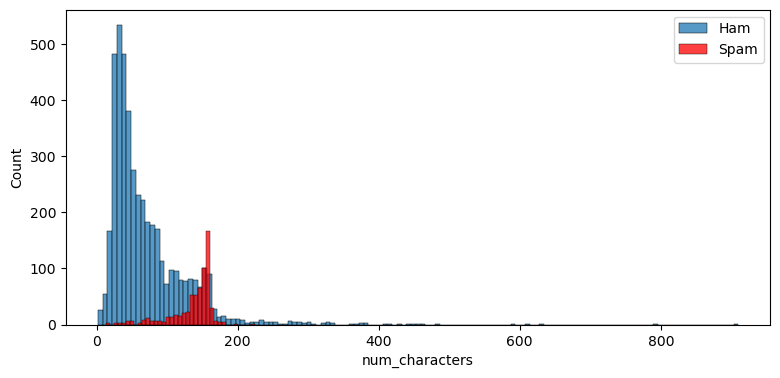

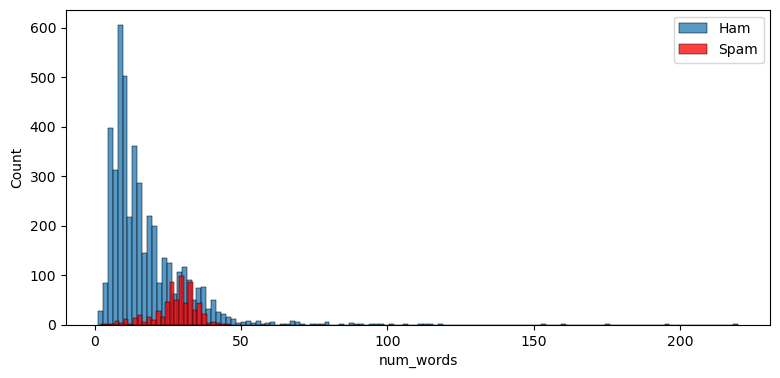

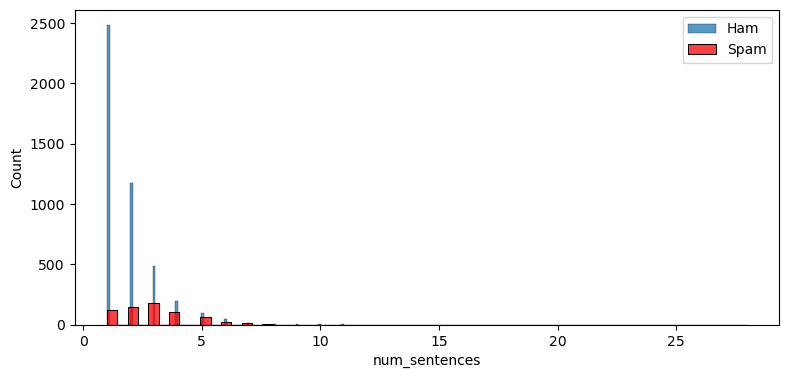

In [178]:
#Histplot based on the Numerical vs targeted column

def bivariate_histplot (df):
    
    for col in df:
        if df[col].dtype != 'object' and (col not in 'target'):
                i=0
                plt.figure(figsize=(20,9))
                plt.subplot(2,2,i+1)
                sns.histplot(df[df.target == 0][col],label= 'Ham')
                sns.histplot(df[df.target == 1][col],color='red',label= 'Spam')
                plt.legend()
                i+=1
bivariate_histplot(df)  

#spam(denoted as 1) text has less no of charactor and words.

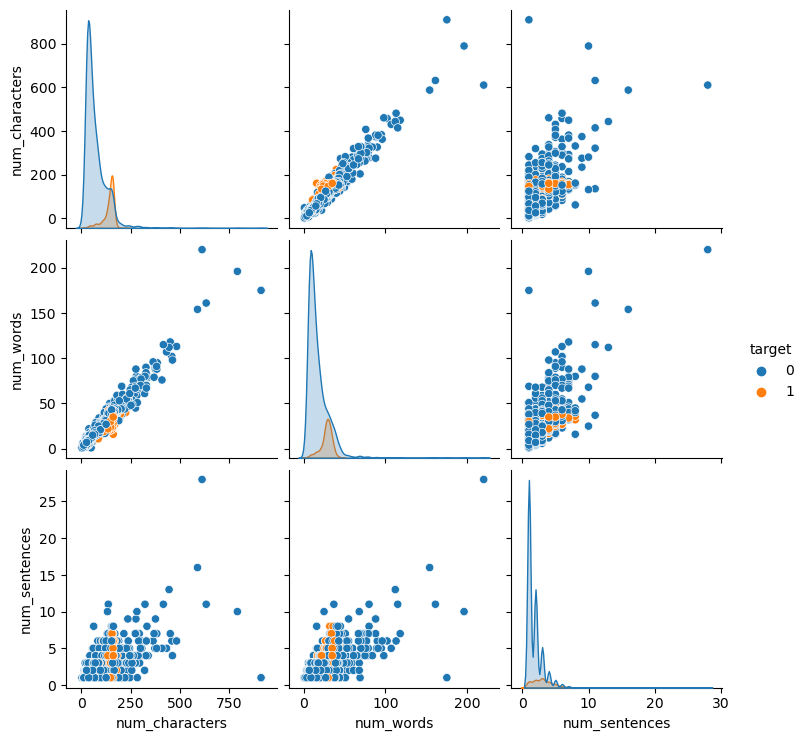

In [36]:
#Plotting pairplot
sns.pairplot(df,hue='target')
plt.show()

#Data contains outliers.
#spam has less number of character, words and sentences compared to ham.
#With increase in words,charactors as well increases (both for ham and spam)


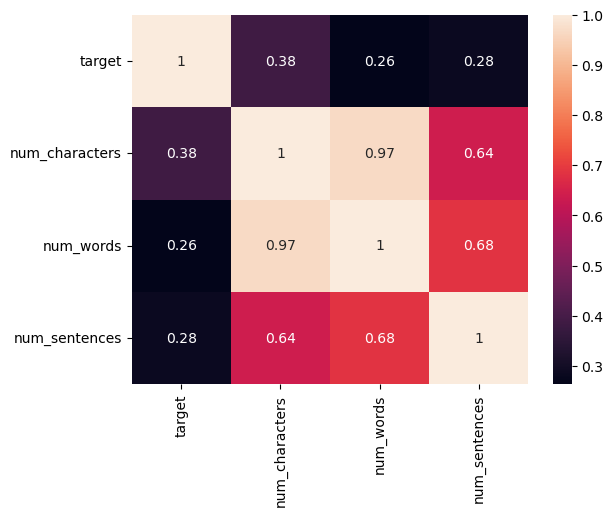

In [37]:
#Check for correlation of various columns with targeted column
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation ='vertical')
plt.show()
#Num_character has strong relation with targe.Thus for model we can keep the num_charactor feature and drop other.
##however self will drop in mine model as the same will provide little accuacy and precission change

# Vectorization of fetched dataset

In [114]:
#Vectorization of transformed_text and target column
tfid = TfidfVectorizer()
x = tfid.fit_transform(df.transformed_text).toarray()
y = df.target.values
x.shape, y.shape

((5169, 6708), (5169,))

# Train Test spliting of dataset after vectorization

In [61]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)

print('='*125)

print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)


Shape of x_train: (4135, 6708)
Shape of x_test: (1034, 6708)
Shape of y_train: (4135,)
Shape of y_test: (1034,)


# Model building 

In [98]:
# Classifier Model dictionary
models = {'LogisticRegression': LogisticRegression(),
          'GaussianNB' : GaussianNB(),
          'MultinomialNB' : MultinomialNB(),
          'BernoulliNB':BernoulliNB(),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5),
          'RandomForestClassifier':RandomForestClassifier(n_estimators=50,random_state=2),
          'BaggingClassifier' : BaggingClassifier(n_estimators=50,random_state=2),
          'ExtraTreesClassifier' : ExtraTreesClassifier(n_estimators=50,random_state=2),
          'XGBClassifier': XGBClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(n_estimators=50,random_state=2),
          'SVC':SVC(kernel='sigmoid',gamma=1.0)
}

In [99]:
# list of model being used in our ML 
for model in models.values():
     print(model)

LogisticRegression()
GaussianNB()
MultinomialNB()
BernoulliNB()
KNeighborsClassifier()
DecisionTreeClassifier(max_depth=5)
RandomForestClassifier(n_estimators=50, random_state=2)
BaggingClassifier(n_estimators=50, random_state=2)
ExtraTreesClassifier(n_estimators=50, random_state=2)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              pred

In [100]:
#fuction for comparing the metrics for all the model
def compare_models(models:dict):
    
    metrics = {'Models':models.keys(), 'accuracy_score': [] , 'Precision_score' : []}
    
    for model in models.values():
        #create object of looped model
        model_object = model
        
        #fit the model
        model.fit(x_train,y_train)
        
        #predict the required accuracy score and precission score
        y_pred = model_object.predict(x_test)
        
        #calculate the accuracy and precision score
        accuracy_s = accuracy_score(y_test,y_pred)
        Precision_s = precision_score(y_test,y_pred)
        
        #appending the fetched score against the looped model
        metrics['accuracy_score'].append(accuracy_s)
        metrics['Precision_score'].append(Precision_s)
        
        
    #create a dataframe fetched accuracy_scores and precision scores
    models_metrics = pd.DataFrame(metrics)
    return models_metrics
            

In [101]:
#Dataframe of model vs performance metrics obtained
model_without_paramtunning = compare_models(models)

model_without_paramtunning

,Models,accuracy_score,Precision_score
0,LogisticRegression,0.946809,0.988235
1,GaussianNB,0.876209,0.523148
2,MultinomialNB,0.959381,1.000000
3,BernoulliNB,0.970019,0.973451
4,KNeighborsClassifier,0.900387,1.000000
5,DecisionTreeClassifier,0.935203,0.838095
6,RandomForestClassifier,0.973888,1.000000
7,BaggingClassifier,0.958414,0.862595
8,ExtraTreesClassifier,0.975822,0.982906
9,XGBClassifier,0.972921,0.936508


# SUMMARY OF PROJECT

### **The summary of the steps executed in ML model are:**

**1. Data collection and overview of the dataframe:**
- The data was extracted from csv file downloaded from kaggle.
- Data consist of 5572 rows and 5 columns.
- Intuition of the data was gained via calling the first five and last five rows.
- There were 99% Nan values present in Unnamed: 2, unnamed: 3 and unnamed: 4 features, so i decided to drop these features.

**2. Feature Engineering:**
- Since Number of character, word and sentences plays a major role in defining a message as spam or pam so i decided to construct such new features in dataframe in order to increase the accuracy and precision of the model.**(Nltk library was used for such construction of feature)** 
- In any sentence/message punctuation, stopword and special character doesnot play any role for deciding factor of spam or ham. So the same text message was changed to a new feature by removing punctuation mark, stopword and special character. Thereafter stemming of each word in message was done to obtain the transformed_text. 

**WordCloud was created for both the ham and spam categories** to get visualisation of words used in ham and spam messages

**3. Exploratory Data Analysis:**
- Univariate Analysis:
    - Dist and QQ plot was ploted for numerical columns which depicted none of the numerical columns are normally distributed. Reason being presence of outliers.

- Bivariate and Multivariate Analysis:
    - Pie plot was created for both the ham and spam categories which indicated that 12% data was spam. **(Highly imbalanced dataframe)**
    - Out of curiosity, self has found the top 30 ham and spam messages word used in the given data set. **(Countplot was plotted for the same)**
    - Function was created for plotting the hist plot of the numerical columns with hue factor (spam and ham). Graph implied spam text has less no of character and word.

**Further pairplot and heatmap was ploted** - Result depicted strong relation of target feature with the number of character compared to other numerical features in the resultant dataframe.

**4. Vectorization of text and target column:**
In case of text feature vectorization need to be performed for accurate result and precision score.

**5. Model Building:**

- Train test split was performed with test_size as 20% and random state of 0.2.
- Further **eleven** model was fitted for the splitted data set and various accuracy_score/prescission score was fetched. 

**Name of model used are below:**
   - LogisticRegression
   - GaussianNB
   - MultinomialNB
   - BernoulliNB
   - KNeighborsClassifier
   - DecisionTreeClassifier
   - RandomForestClassifier
   - BaggingClassifier
   - ExtraTreesClassifier
   - XGBClassifier
   - AdaBoostClassifier
   - SVC
    
**6. Conclusion:**
- Since the given problem need to have **type 1 error problem**, so we need to select the model which give high precision with feasible accuarcy.
- **MultinomialNB algorithm** outstanded the performance of model with **accuracy_score of ~95%** and **precision_score of 1.00**.So i selected **MultinomialNB algorithm** of **naive_bayes with tgifvectorization** as the final model for the above said problem.

# Flow for prediction of new message recived - Spam/Ham

In [172]:
#predict test of lateral spam and ham message

#vectorization based on dataframe available
tfid = TfidfVectorizer()
x = tfid.fit_transform(df.transformed_text).toarray()
y = df.target.values

#model training
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
#print('Shape of x_train:',x_train.shape)
#print('Shape of x_test:',x_test.shape)



#print('Shape of y_train:',y_train.shape)
#print('Shape of y_test:',y_test.shape)

mn = MultinomialNB()
mn.fit(x_train,y_train)

#predicting the message recived
#let the input message be the first message of given data frame.

input_msg = df.text[5567]
print('Message recived from output source:', input_msg)
#transforming the message using transform function
trans_msg = transform_text(input_msg)
#vectorise the transformed message
vector_trf_Msg_input = tfid.transform([trans_msg]).toarray()
prediction = mn.predict(vector_trf_Msg_input)

print(' '*125)
print('='*125)
print(' '*125)


if prediction==1 :
    print('The recieved message is : Spam Message')
else:
    print('The recieved message is : Ham Message')
    


Message recived from output source: This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.
                                                                                                                             
                                                                                                                             
The recieved message is : Spam Message
